### Import Libraries

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

<!--  -->

### Sample Data

- Train Data

In [109]:
# Generate Synthetic Data
np.random.seed(11)
# [:70]: To have only two peaks / direction changes like for degree 3 (cubic model)
X = np.sort((np.random.rand(100,1) * 10), axis=0)[:62] # np.random.rand(100,1): 100 Random values < 1 with 1 column; np.sort() , axis=0 sorting rows in 1st col
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0]) 
# Adding noise as below normal distribution, so that it follows bell curve while innroducing noise, mostly higher dispersion will be near tip of bell curve.
# Without bell curve noise, the y values will be exact sin curve, as we wanted to show realistic dispersion along with sin curve so using noise 
# y = np.random.normal(0, 0.1, X.shape[0])
y

array([ 0.02129503,  0.12378114,  0.14590219,  0.28643776,  0.11951236,
        0.51536446,  0.53592759,  0.56954969,  0.77351955,  0.55071873,
        0.68882932,  0.77149092,  0.97126992,  0.77221196,  1.0312094 ,
        1.04344303,  1.0842234 ,  1.00028448,  0.82896419,  0.90850109,
        1.01789044,  0.68006623,  0.23181815,  0.3207482 ,  0.19810696,
       -0.05008536,  0.14619822, -0.25141802, -0.40078259, -0.11121526,
       -0.22687307, -0.17878338, -0.24830622, -0.43739938, -0.38756208,
       -0.46835342, -0.64584398, -0.48759592, -0.74037887, -0.58437619,
       -0.97783488, -0.87087247, -0.98182258, -0.95842331, -0.81705305,
       -0.95743647, -1.04324201, -0.98095581, -0.91333556, -1.08641775,
       -0.71488228, -0.4628368 , -0.47926545, -0.50794132, -0.33154567,
       -0.27494553, -0.3212    , -0.02838794, -0.0207024 ,  0.05397136,
        0.0087742 ,  0.12460376])

- Test Data

In [212]:
X_test = np.sort((np.random.rand(100,1) * 10), axis=0)[65:74]
y_test = np.sin(X_test).ravel() + np.random.normal(0.45, 0.26, X_test.shape[0])

<!--  -->

### EDA Plot

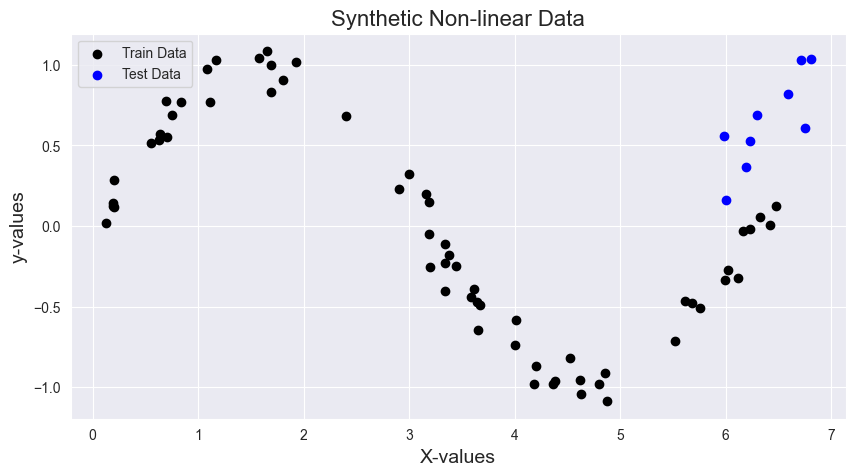

In [213]:
# Plot the synthetic data
sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.scatter(X, y, color='black', label='Train Data')
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.xlabel('X-values', fontsize=14)
plt.ylabel('y-values', fontsize=14)
plt.title('Synthetic Non-linear Data', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

<!--  -->

### Model Fit

- Step 1: Prepare Polynomial degree features based on raw input variable
- Step 2: 
    - Fit model i.e., finding best weights i.e., a,b,c in quadratic model --> y = ax**2 + bx + c
    - Fit model i.e., finding best weights i.e., a,b,c in cubic model --> y = ax** 3 + bx**2 + cx + d

- **Linear Model**

In [214]:
# Linnear Regression Model Fit
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

- **Quadratic Regression Model**

In [215]:
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(X)
quadratic_model = LinearRegression()
quadratic_model.fit(x_poly2, y)

LinearRegression()

In [216]:
print("--"*20)
print("Raw X Values:")
print("--"*20)
print(X[:5])
print("--"*20)
print("Quadratic Transformed Features:")
print("--"*20)
print(x_poly2[:5])

# x**2 = 0.12780815**2 # 0.01633492

----------------------------------------
Raw X Values:
----------------------------------------
[[0.12780815]
 [0.19343362]
 [0.19475241]
 [0.20483613]
 [0.20732979]]
----------------------------------------
Quadratic Transformed Features:
----------------------------------------
[[1.         0.12780815 0.01633492]
 [1.         0.19343362 0.03741657]
 [1.         0.19475241 0.0379285 ]
 [1.         0.20483613 0.04195784]
 [1.         0.20732979 0.04298564]]


- **Cubic Regression Model**

In [217]:
poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(X)
cubic_model = LinearRegression()
cubic_model.fit(x_poly3, y)

LinearRegression()

In [218]:
print("--"*20)
print("Raw X Values:")
print("--"*20)
print(X[:5])
print("--"*20)
print("Cubic Transformed Features:")
print("--"*20)
print(x_poly3[:5])

# x**2 = 0.12780815**2 # 0.01633492
# x**3 = 0.12780815**3 # 0.00208774

----------------------------------------
Raw X Values:
----------------------------------------
[[0.12780815]
 [0.19343362]
 [0.19475241]
 [0.20483613]
 [0.20732979]]
----------------------------------------
Cubic Transformed Features:
----------------------------------------
[[1.         0.12780815 0.01633492 0.00208774]
 [1.         0.19343362 0.03741657 0.00723762]
 [1.         0.19475241 0.0379285  0.00738667]
 [1.         0.20483613 0.04195784 0.00859448]
 [1.         0.20732979 0.04298564 0.0089122 ]]


<!--  -->

### Model Predictions

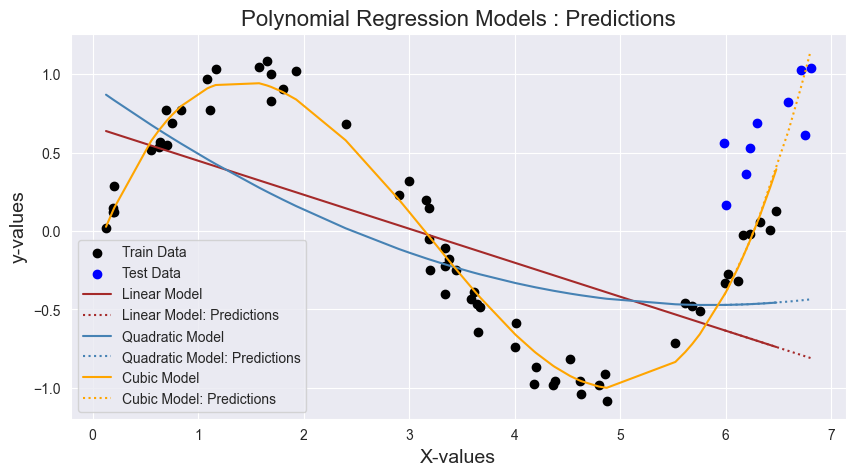

In [229]:
def plot_predictions(X, model, poly_features, line_style, color, label):
    X_poly = poly_features.transform(X)
    y_pred = model.predict(X_poly)
    # Plot
    plt.plot(X, y_pred, linestyle=line_style, color=color, label=label)

# Plot Actual Data
sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.scatter(X, y, color="black", label="Train Data")
plt.scatter(X_test, y_test, color="blue", label="Test Data")
plt.xlabel('X-values', fontsize=14)
plt.ylabel('y-values', fontsize=14)
plt.title('Polynomial Regression Models : Predictions', fontsize=16)

# Plot Linear Model Predictions
y_pred_train = linear_model.predict(X)
y_pred_test = linear_model.predict(X_test)
plt.plot(X, y_pred_train, color="brown", label="Linear Model")
plt.plot(X_test, y_pred_test, linestyle="dotted", color="brown", label="Linear Model: Predictions")

# Plot Quadratic Model Predictions
plot_predictions(X, quadratic_model, poly2, line_style="-", color="steelblue", label="Quadratic Model")
plot_predictions(X_test, quadratic_model, poly2, line_style="dotted", color="steelblue", label="Quadratic Model: Predictions")

# Plot Cubic Model Predictions
plot_predictions(X, cubic_model, poly3, line_style="-", color="orange", label="Cubic Model")
plot_predictions(X_test, cubic_model, poly3, line_style="dotted", color="orange", label="Cubic Model: Predictions")

plt.legend()
plt.grid(True)
plt.show()

### Observations

- In this sample data, the pattern has two direction changes that resembles with the polynomial cubic regressison [degree=3] distribution.
- Hence, on applying all three different polynomial regression models i.e., linear, quadratic and cubic models. Cubic model seems to follow the data pattern more accurately, as sample data follows assumption (i.e., two direction changes) of cubic model.